# Fake Dataset - Users and Mentions 

### fake_users_cloud.py, fake_mentions_cloud.py, fake_users_barchart_of_cloud.py

We've used the following packages

In [1]:
import pandas as pd
import numpy as np
import json
import sys
import string
import re
import itertools  
from emot.emo_unicode import UNICODE_EMO, EMOTICONS
import emoji
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt 
import nltk
from PIL import Image
import altair as alt

Read the JSON

In [2]:
data = []
with open('dataset/fakecovid_result_translated_full.json', 'r') as f:
    for line in f:
        data.append(json.loads(line))


Filter the users and calculate the frequency distribution and visualize it

In [3]:
index_users=0
cmt_list_users = []
for element in data:
    token_users=data[index_users]['user']['screen_name']
    cmt_list_users.append(token_users)
    index_users=index_users+1

fdist_users = dict(nltk.FreqDist(cmt_list_users))
fdist_sorted = dict(sorted(fdist_users.items(), key=lambda item: item[1], reverse=True))
#print(fdist_sorted)
out = dict(itertools.islice(fdist_sorted.items(), 15))

df = pd.DataFrame.from_dict(out, orient='index').reset_index()
df = df.rename(columns={'index':'usernames', 0:'count'})
#print(df)
alt.renderers.enable('altair_viewer',inline=True)


alt.Chart(df, title="Most 15 frequent usernames in the dataset").mark_bar().encode(
    x='count',
    y='usernames',
    color=alt.value('green'),
    opacity=alt.value(0.7)
    
)

alt.Chart(...)

Users Word Cloud

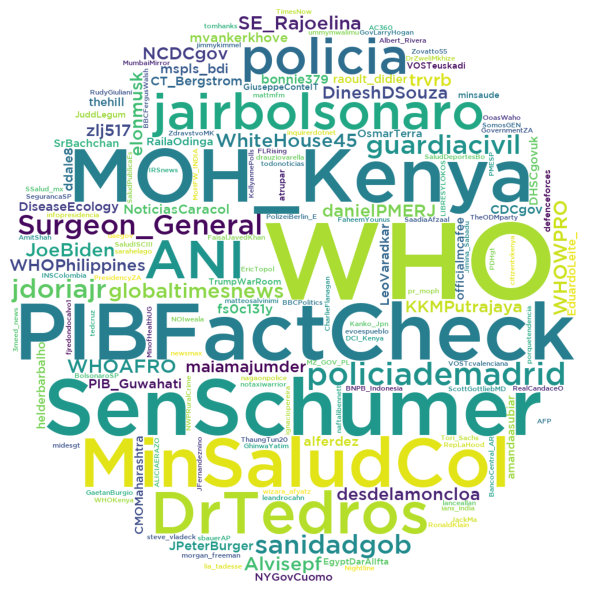

In [4]:
mask = np.array(Image.open('grafici/circle.jpg'))

wordcloud = WordCloud(background_color ='white', 
                font_path = 'grafici/GothamMedium.ttf',
                mask=mask,
                width=mask.shape[1],
                height=mask.shape[0],
                min_word_length = 3,
                max_words=400,
               min_font_size = 10).generate_from_frequencies(fdist_users) 


#plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()

Filter the mentions and calculate the frequency distribution and visualize it

In [5]:
index_mentions=0
cmt_list_mentions = []
for element in data:
    for entity in data[index_mentions]['entities']['user_mentions']:
        token_mentions=entity['screen_name']
        cmt_list_mentions.append(token_mentions)
    index_mentions=index_mentions+1


fdist_mentions = dict(nltk.FreqDist(cmt_list_mentions))
fdist_sorted_mentions = dict(sorted(fdist_mentions.items(), key=lambda item: item[1], reverse=True))
#print(fdist_sorted)
out_mentions = dict(itertools.islice(fdist_sorted_mentions.items(), 15))

df_mentions = pd.DataFrame.from_dict(out_mentions, orient='index').reset_index()
df_mentions = df_mentions.rename(columns={'index':'usernames', 0:'count'})
#print(df)
alt.renderers.enable('altair_viewer',inline=True)


alt.Chart(df_mentions, title="Most 15 frequent mentioned usernames in the dataset").mark_bar().encode(
    x='count',
    y='usernames',
    color=alt.value('blue'),
    opacity=alt.value(0.7)
    
)

alt.Chart(...)

Mentions Word Cloud

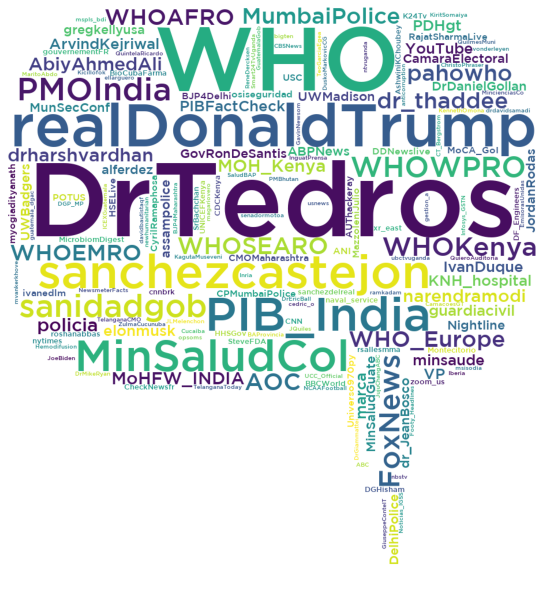

In [6]:
mask=np.array(Image.open('grafici/speech_bubble_8.jpg'))

wordcloud = WordCloud(mask=mask,
            width=mask.shape[1],
            height=mask.shape[0],
               background_color ='white', 
                min_word_length = 3,
                max_words=300,
                font_path = 'grafici/GothamMedium.ttf',
               min_font_size = 10).generate_from_frequencies(fdist_mentions) 

#plot the WordCloud image                        

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 